PART 1

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms

In [12]:
data_transforms = transforms.Compose([
  transforms.Resize((224,224)),
  transforms.RandomHorizontalFlip(),
  transforms.ToTensor(),
  transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

In [13]:
trainset = datasets.CIFAR100(root='.', train = True, transform = data_transforms,
download=True)
testset = datasets.CIFAR100(root='.', train=False, transform = data_transforms,
download=True)

Files already downloaded and verified
Files already downloaded and verified


In [14]:
data = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)


In [15]:
model = models.vgg16(pretrained = True)
print(model)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [16]:
num_in_ftrs = model.classifier[6].in_features
print(num_in_ftrs)


4096


In [17]:
num_cls = 100
model.classifier[6] = nn.Linear(num_in_ftrs, num_cls, bias=True)

In [18]:
for param in model.parameters():
  param.requires_grad = False
for param in model.classifier[6].parameters():
  param.requires_grad = True

In [19]:
num_epochs = 10

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
for i in range(10):
  for j, batch in enumerate(data):
    images, labels = batch
    images = images.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()

    outputs = model(images)

    loss = criterion(outputs,labels)
    loss.backward()

    optimizer.step()


  scheduler.step()

  best_model_str = 'best_model' + str(i) + '.pth'
  torch.save(model.state_dict(), best_model_str)



In [21]:
data = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [24]:
accuracy = 0
for i in range(10):
  model.load_state_dict(torch.load('best_model' + str(i) + '.pth'))
  model.eval()
  predictions_array = []
  labels_array = []
  for i in range(1):
    for j, batch in enumerate(data):

      images, labels = batch
      images = images.to(device)
      labels = labels.to(device)
      outputs = model(images)
      _, predictions = torch.max(outputs, 1)
      predictions_array += predictions
      labels_array += labels

  correlation_count = 0
  samples = len(predictions_array)
  for i in range(len(predictions_array)):
    if predictions_array[i].item() == labels_array[i].item():
      correlation_count += 1

  temporary_accuracy = correlation_count/samples

  if temporary_accuracy > accuracy:
    accuracy = temporary_accuracy
    print(accuracy)
    print(i)

0.5942
9999
0.597
9999
0.5994
9999
0.6002
9999
0.6012
9999
0.6018
9999


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, TensorDataset

In [2]:
# Load CIFAR-100
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
testset = datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

trainset = DataLoader(trainset, batch_size=64, shuffle=True)
testset = DataLoader(testset, batch_size=64, shuffle=False)


100%|██████████| 169001437/169001437 [00:01<00:00, 97099800.95it/s] 


Extracting ./data/cifar-100-python.tar.gz to ./data
Files already downloaded and verified


In [3]:
# Model
class CNN(nn.Module):
    def __init__(self):

        super(CNN, self).__init__()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        self.convolution_1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.convolution_2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.convolution_3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)

        self.linear_layer_1 = nn.Linear(128 * 4 * 4, 512)
        self.linear_layer_2 = nn.Linear(512, 100)


    def forward(self, x):
        x = self.pool(nn.functional.relu(self.convolution_1(x)))
        x = self.pool(nn.functional.relu(self.convolution_2(x)))
        x = self.pool(nn.functional.relu(self.convolution_3(x)))
        x = x.view(-1, 128 * 4 * 4)
        x = nn.functional.relu(self.linear_layer_1(x))
        x = self.linear_layer_2(x)
        return x

In [ ]:
# Initialize model
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Put model in GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Train model
epochs = 30
for epoch in range(epochs):

    model.train()

    for i, (images, labels) in enumerate(trainset):

        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


    print(f'Epoch [{epoch + 1}]')
    print(f'Loss: {loss.item():.4f}')

Epoch [1]
Loss: 2.8258
Epoch [2]
Loss: 1.7600
Epoch [3]
Loss: 1.8401
Epoch [4]
Loss: 2.0146
Epoch [5]
Loss: 1.9149
Epoch [6]
Loss: 1.7809
Epoch [7]
Loss: 1.5063
Epoch [8]
Loss: 1.0980
Epoch [9]
Loss: 0.8968
Epoch [10]
Loss: 1.0871
Epoch [11]
Loss: 0.9639
Epoch [12]
Loss: 0.5508
Epoch [13]
Loss: 0.2935
Epoch [14]
Loss: 0.6133
Epoch [15]
Loss: 0.2655
Epoch [16]
Loss: 0.2447
Epoch [17]
Loss: 0.3271
Epoch [18]
Loss: 0.4064
Epoch [19]
Loss: 0.0848
Epoch [20]
Loss: 0.0452
Epoch [21]
Loss: 0.0257
Epoch [22]
Loss: 0.2009
Epoch [23]
Loss: 0.1878
Epoch [24]
Loss: 0.0428
Epoch [25]
Loss: 0.2624
Epoch [26]
Loss: 0.0056
Epoch [27]
Loss: 0.1480
Epoch [28]
Loss: 0.3767
Epoch [29]
Loss: 0.1630


In [ ]:
# Evaluate and test

accuracy = 0
model.eval()
predictions_array = []
labels_array = []

for i in range(1):
  for j, batch in enumerate(testset):

    images, labels = batch
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    _, predictions = torch.max(outputs, 1)

    # Outputs
    predictions_array += predictions
    labels_array += labels

# Initialize
correlation_counter = 0
samples = len(predictions_array)

# Determine correlated outputs
for i in range(len(predictions_array)):
  if predictions_array[i].item() == labels_array[i].item():
    correlation_counter += 1
temporary_accuracy = correlation_counter/samples

# Print accuracy
if temporary_accuracy > accuracy:
  accuracy = tmp
  print(accuracy)

In [21]:
import torch
from torchvision.models.segmentation import fcn_resnet50
from torchvision.transforms import functional as F
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
model = fcn_resnet50(pretrained=True).eval()

In [24]:
image_paths = ['/content/bicycle_train_person.jpg', '/content/sheep_dog_person.jpg', '/content/horse_cow_dog.jpg', '/content/car_bus_bike.jpg', '/content/cat_dog_chair.jpg']

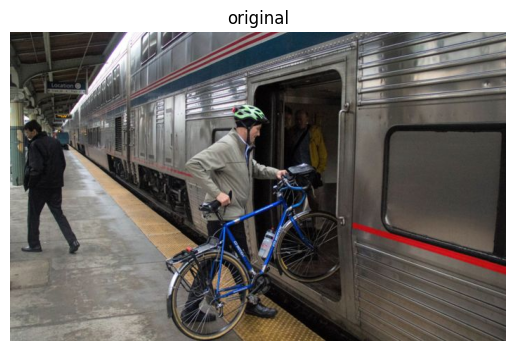

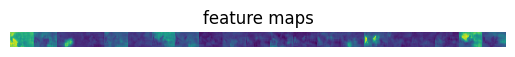

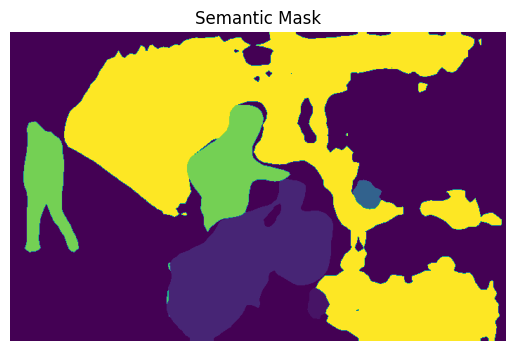

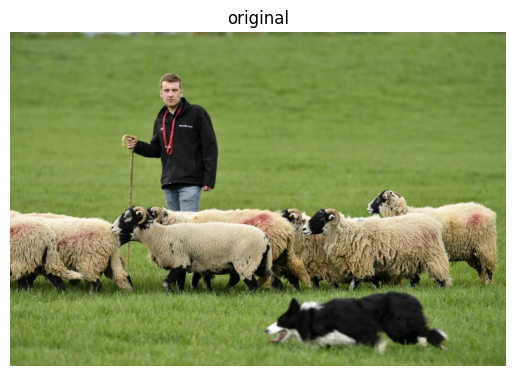

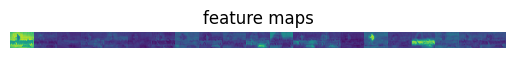

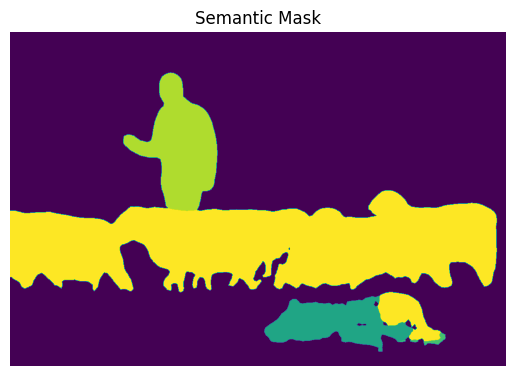

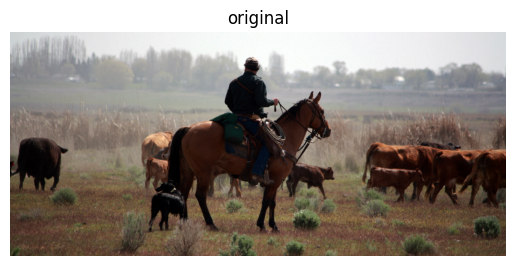

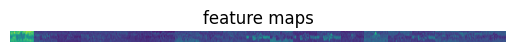

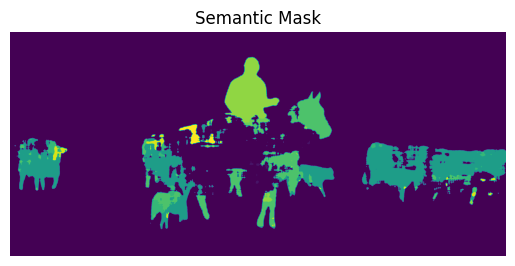

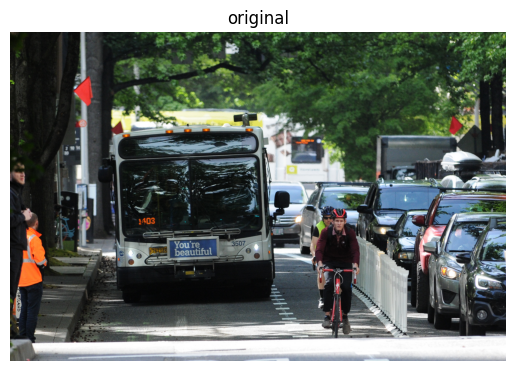

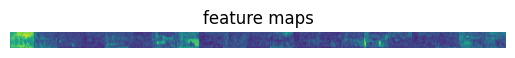

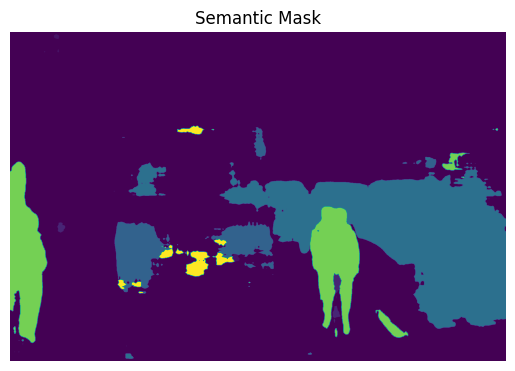

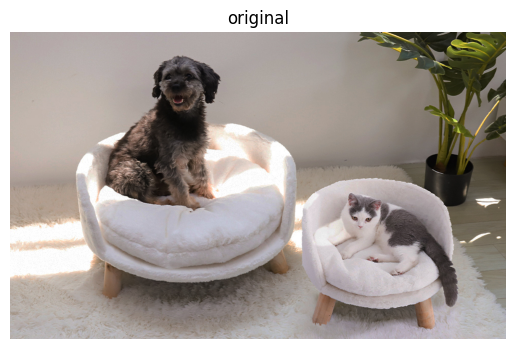

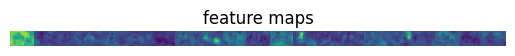

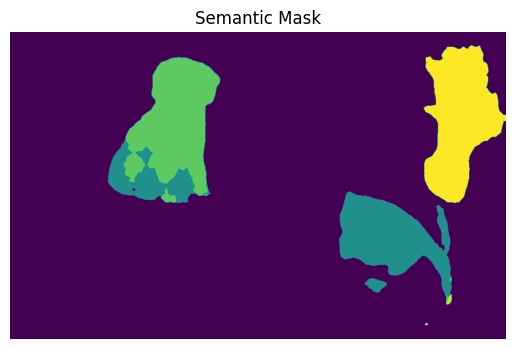

In [26]:
# Image processing to generate semantic masks
for image_path in image_paths:

    # Load image
    image = Image.open(image_path).convert("RGB")
    input_tensor = F.to_tensor(image).unsqueeze(0)

    # Model
    with torch.no_grad():
        output = model(input_tensor)['out']

    feature_maps = output[0].detach().cpu().numpy()

    # Organize feature maps
    feature_maps = np.concatenate(feature_maps, axis=1)

    # Display original
    plt.imshow(np.array(image))
    plt.axis('off')
    plt.title("original")
    plt.show()

    # Display feature maps
    plt.imshow(feature_maps, cmap='viridis')
    plt.axis('off')
    plt.title("feature maps")
    image_path = image_path[9:-4]
    plt.savefig('/content/drive/MyDrive/' + image_path + '_map.jpg')
    plt.show()

    # Calculate semantic mask
    _, prediction = torch.max(output, 1)
    semantic_mask = prediction[0].detach().cpu().numpy()

    # Display segmentation
    plt.imshow(semantic_mask)
    plt.axis('off')
    plt.title("Semantic Mask")
    plt.savefig('/content/drive/MyDrive/' + image_path + '_mask.jpg')
    plt.show()